<a href="https://colab.research.google.com/github/yvkrishna/AI-webapp/blob/master/Paddy_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/yvkrishna/paddy_disease_classification.git

Cloning into 'paddy_disease_classification'...
remote: Enumerating objects: 555, done.
remote: Counting objects: 100% (555/555), done.
remote: Compressing objects: 100% (535/535), done.
remote: Total 555 (delta 38), reused 515 (delta 20), pack-reused 0
Receiving objects: 100% (555/555), 38.19 MiB | 45.48 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os 
from os import path
from PIL import Image
from tqdm import tqdm
from google.colab import files

In [101]:
# importing all tensorflow modules 
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Dropout, Dense
from tensorflow.keras import Model

In [6]:
os.chdir('/content')

Numpy is used to manipulating and using arrays of data easily.

Pandas helps us to play with the data .

Matplotlib is used to visulaize the data.

In [7]:
os.chdir('paddy_disease_classification/rice_leaf_diseases')
path = os.getcwd()
training_classes = [f.name for f in os.scandir(path) if f.is_dir()]
print(training_classes)

['Leaf smut', 'Brown spot', 'Bacterial leaf blight']


Image Pre Processing Steps

In [8]:
def applyMedian(folder):
  ''' 
    Applies Meadian Filter to all the images in the given folder. 
    Args : 
      # img_loc: (str). : Image_dir in the current class.
      # img_save: (str). : Image_dir to save the images
      Folder : (str). : Image_directory
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()

  for image in tqdm(list(os.listdir(current_path))):
    img = cv2.imread(image)
    # applies median filter to the image.
    median = cv2.medianBlur(img, 5)
    # saving the image by adding the blur feature.
    im = Image.fromarray(median)
    im.save(image)
  os.chdir(previous_path)

In [9]:
for folder in training_classes:
  applyMedian(folder)

100%|██████████| 40/40 [00:05<00:00,  7.05it/s]


In [10]:
os.chdir('/content')

In [11]:
base_dir = 'paddy_disease_classification'
train_dir = os.path.join(base_dir, 'rice_leaf_diseases')

In [12]:
train_bact_leaf_smut_dir = os.path.join(train_dir, 'Bacterial leaf blight')  # directory with our training cat pictures
train_brown_spot_dir = os.path.join(train_dir, 'Brown spot')  # directory with our training dog pictures
train_leaf_smut_dir = os.path.join(train_dir, 'Leaf smut')  # directory with our training dog pictures

In [13]:
num_bact_leaf_smut_tr = len(os.listdir(train_bact_leaf_smut_dir))
num_brown_spot_tr = len(os.listdir(train_brown_spot_dir))
num_leaf_smut_tr = len(os.listdir(train_leaf_smut_dir))

total_train = num_bact_leaf_smut_tr + num_brown_spot_tr + num_leaf_smut_tr\

In [14]:
print('total training Bacterial leaf blight images:', num_bact_leaf_smut_tr)
print('total training Brown spot images:', num_brown_spot_tr)
print('total training Leaf smut images:', num_leaf_smut_tr)
print("--")
print("Total training images:", total_train)

total training Bacterial leaf blight images: 40
total training Brown spot images: 40
total training Leaf smut images: 40
--
Total training images: 120


In [15]:
BATCH_SIZE = 20
IMG_SHAPE  = 299

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 120 images belonging to 3 classes.


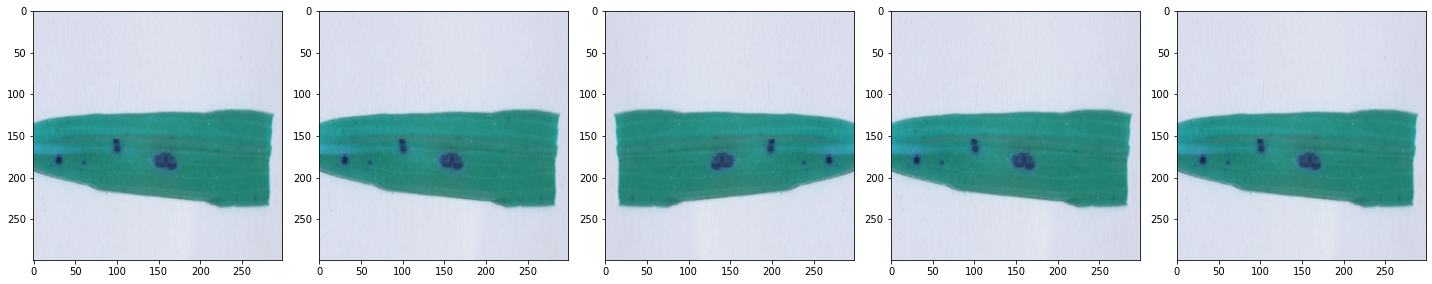

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=90)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 120 images belonging to 3 classes.


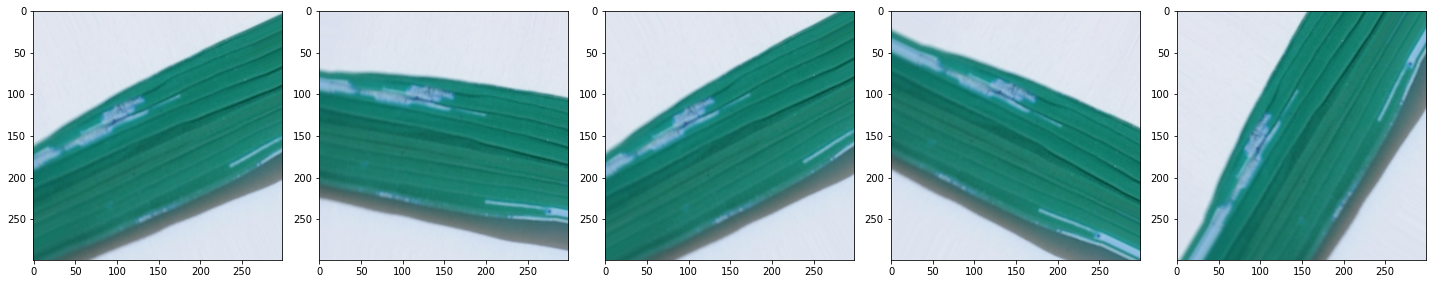

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 120 images belonging to 3 classes.


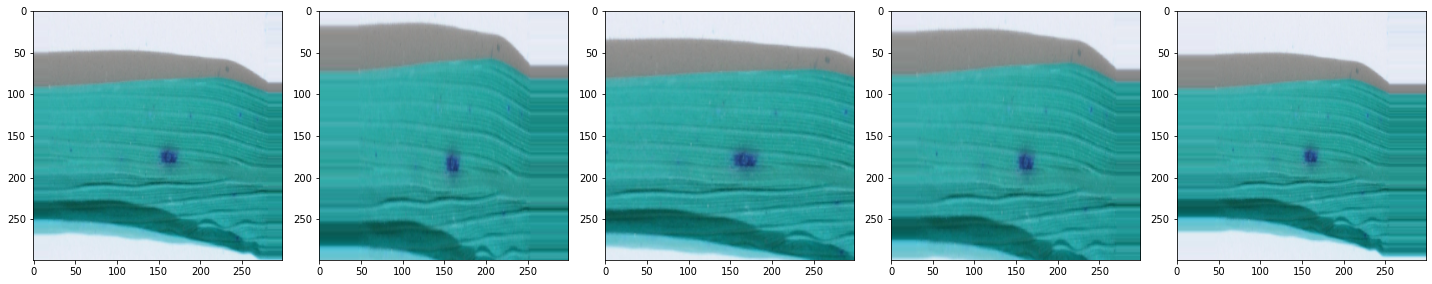

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
# Putting All Together

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')

Found 120 images belonging to 3 classes.


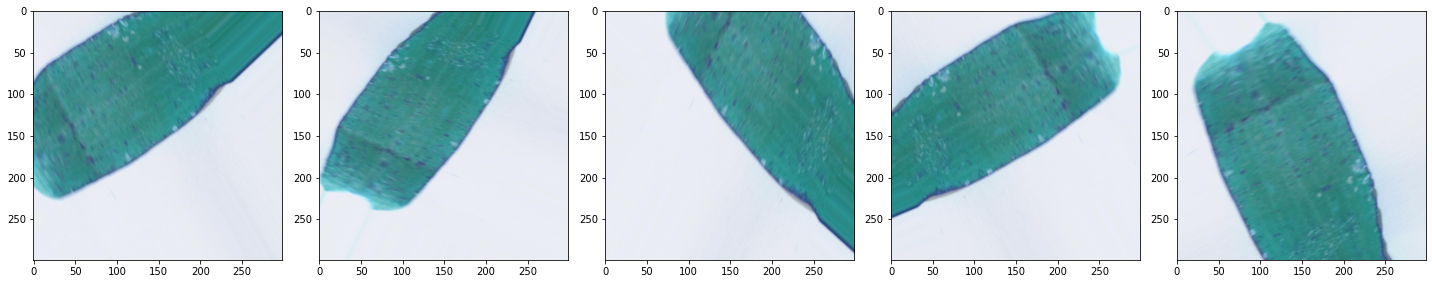

In [27]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [29]:
# Deenin in reference ga ikkade unchu. Dont change the code
# img = cv2.imread('leaf.JPG')
# leaf_img = plt.imread('leaf.JPG')
# median = cv2.medianBlur(img, 5)
# compare = np.concatenate((img, median), axis=1) #side by side comparison
# plt.subplot(1,2,1)
# plt.imshow(leaf_img,aspect='auto')
# plt.subplot(1,2,2)
# plt.imshow(median,aspect='auto')

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [31]:
# Pre trained model 
inception_resnet_V2_pre_trained = InceptionResNetV2(include_top=True, weights='imagenet', pooling=None)

225214464/225209952 [==============================] - 1s 0us/step


In [32]:
for layer in inception_resnet_V2_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='sigmoid')(inception_resnet_V2_pre_trained.output)
inception_resnet_V2 = Model(inputs=inception_resnet_V2_pre_trained.input, outputs=predictions)

In [36]:
inception_resnet_V2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

EPOCHS = 10
history_inception_resnet_v2 = inception_resnet_V2.fit(
    train_data_gen,
    epochs=EPOCHS
)

Epoch 1/10
6/6 [==============================] - 5s 895ms/step - loss: 0.6256 - accuracy: 0.8917
Epoch 2/10
6/6 [==============================] - 5s 909ms/step - loss: 0.6229 - accuracy: 0.8833
Epoch 3/10
6/6 [==============================] - 5s 902ms/step - loss: 0.6251 - accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 5s 902ms/step - loss: 0.6181 - accuracy: 0.8833
Epoch 5/10
6/6 [==============================] - 5s 908ms/step - loss: 0.6163 - accuracy: 0.8667
Epoch 6/10
6/6 [==============================] - 5s 915ms/step - loss: 0.6196 - accuracy: 0.8250
Epoch 7/10
6/6 [==============================] - 5s 906ms/step - loss: 0.6094 - accuracy: 0.8750
Epoch 8/10
6/6 [==============================] - 5s 908ms/step - loss: 0.6077 - accuracy: 0.8750
Epoch 9/10
6/6 [==============================] - 5s 882ms/step - loss: 0.6076 - accuracy: 0.8417
Epoch 10/10
6/6 [==============================] - 5s 906ms/step - loss: 0.5991 - accuracy: 0.9083


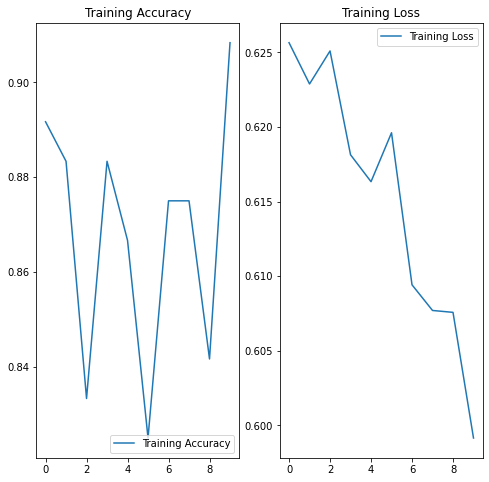

In [37]:
acc = history_inception_resnet_v2.history['accuracy']

loss = history_inception_resnet_v2.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [ ]:
# export_path_sm = "./inception_resnet_v2"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [ ]:
result_inception_resnet_v2 = {}

In [61]:
inception_resnet_V2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [50]:
os.chdir('/content')

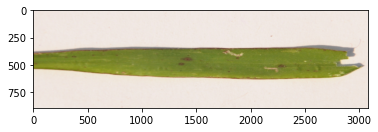

In [60]:
os.chdir('paddy_disease_classification/testing/Leaf smut')
test_image = plt.imread('DSC_0293.JPG')
img = keras.preprocessing.image.load_img('DSC_0293.JPG', target_size=(299,299, 3))
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.inception_v3.preprocess_input(img)
plt.imshow(test_image)
os.chdir('/content')

In [113]:
layer_name = 'block8_1_conv'

# Taking output from 'block8_1_conv'
layer_output = inception_resnet_V2.get_layer(layer_name).output

# Generating a substance model from the pre_trained_model.
# model with input layer of pre_trained_model and output layer of 'mixed_7a'
feature_extraction_model_1 = tf.keras.Model(inputs=inception_resnet_V2.input, outputs=layer_output)

# Extracting the features
result = feature_extraction_model_1.predict(img)
print(result.shape)

(1, 8, 8, 2080)


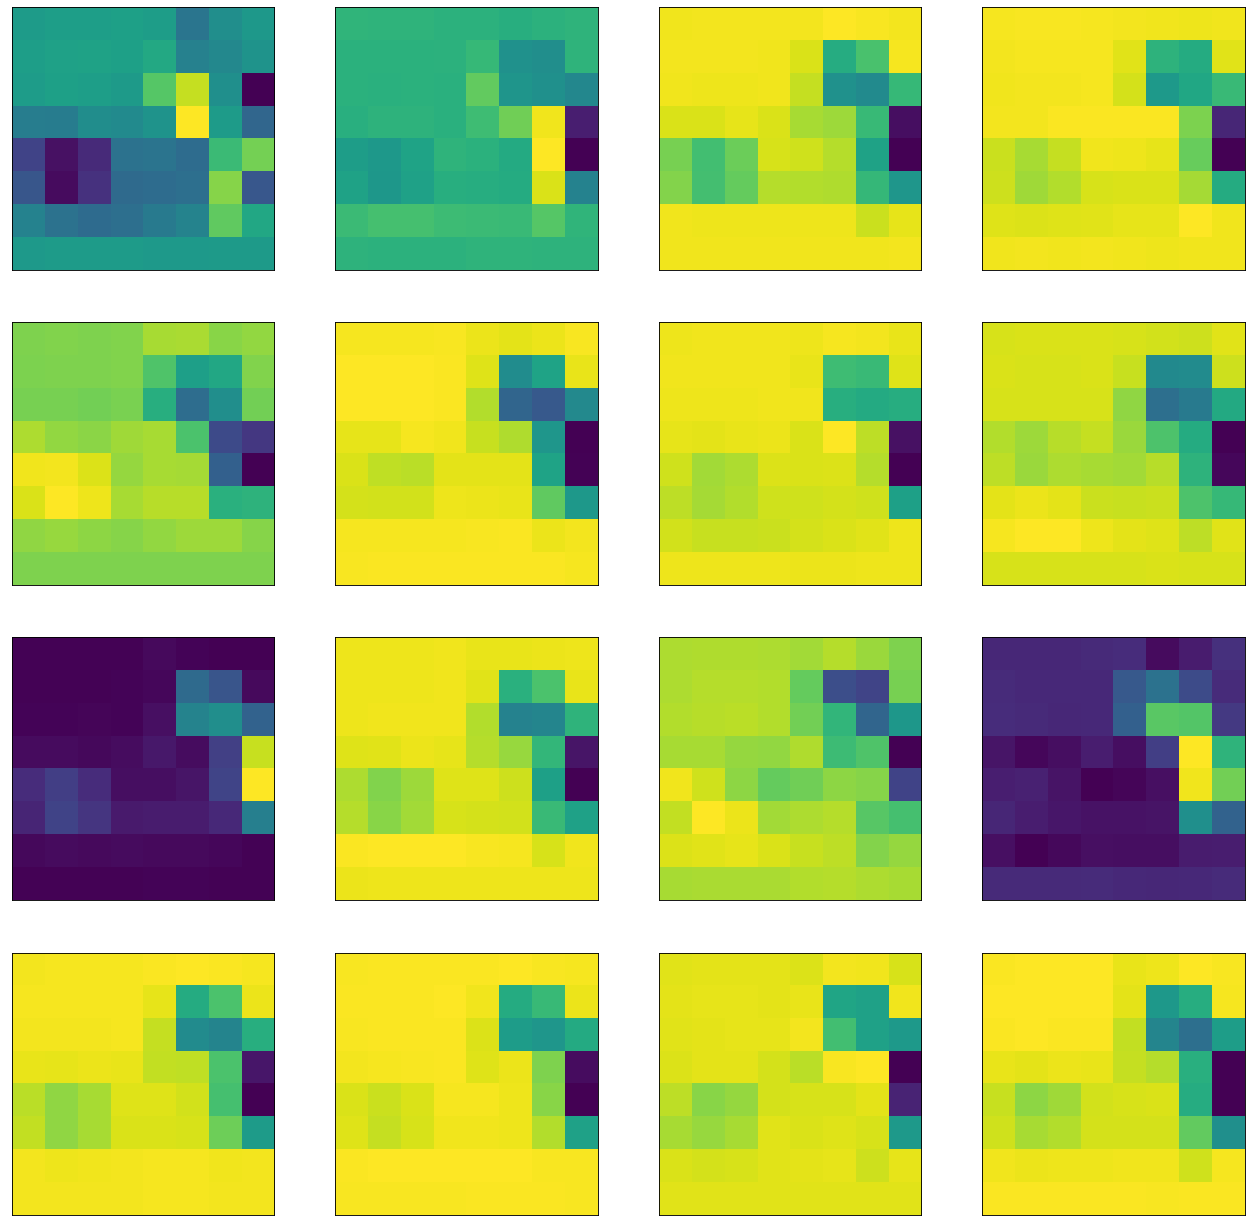

<Figure size 432x288 with 0 Axes>

In [97]:

'''	Plotting Various Features obtained from feature_extraction_model. '''
plot_limit = 4
index = 1
i=1500
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, i-1])
		index += 1;i-=1
# show the figure
plt.show()
# Saving the Plot for future reference.
plt.savefig('Activations1.png')

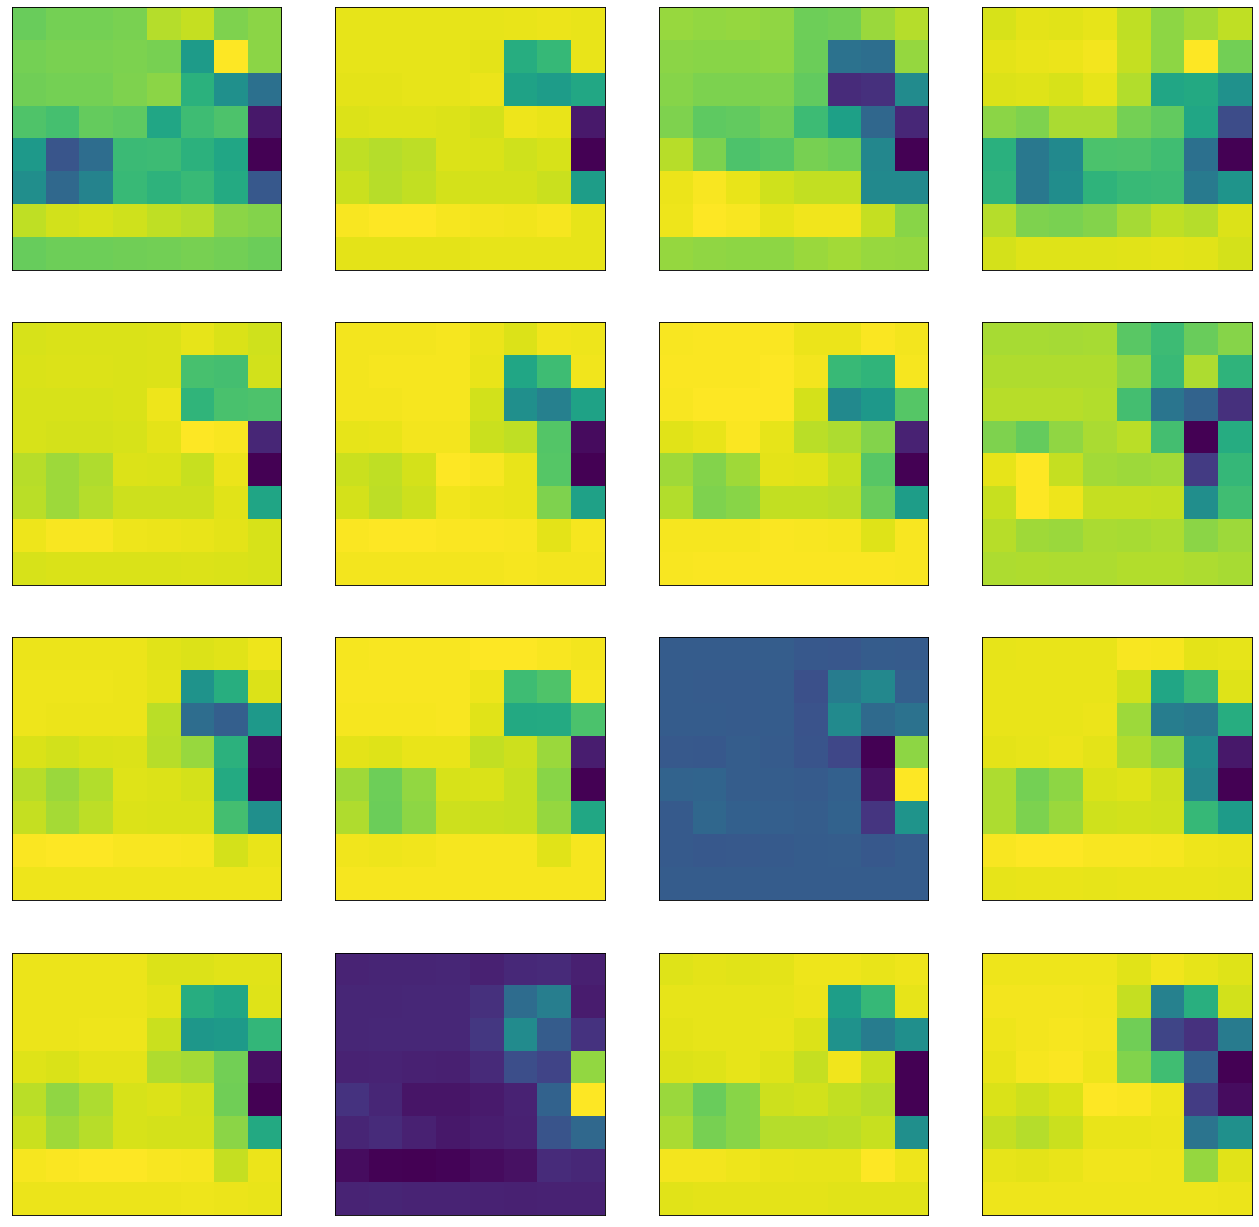

<Figure size 432x288 with 0 Axes>

In [98]:
# PLoting various features from the feature_extraction_model
plot_limit = 4
index = 1
layer_no = 1087
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, layer_no],aspect="auto")
		index += 1;layer_no -= 1;
# show the figure
plt.show()
plt.savefig('Activations2.png')

In [102]:
# Pre trained model 
inception_V3_pre_trained = InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 1s 0us/step


In [103]:
for layer in inception_V3_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='sigmoid')(inception_V3_pre_trained.output)
inception_V3 = Model(inputs=inception_V3_pre_trained.input, outputs=predictions)

In [104]:
inception_V3.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

EPOCHS = 10
history_inception_V3 = inception_V3.fit(
    train_data_gen,
    epochs=EPOCHS
)

Epoch 1/10
6/6 [==============================] - 4s 645ms/step - loss: 0.6890 - accuracy: 0.4667
Epoch 2/10
6/6 [==============================] - 5s 780ms/step - loss: 0.6815 - accuracy: 0.5583
Epoch 3/10
6/6 [==============================] - 5s 750ms/step - loss: 0.6778 - accuracy: 0.5500
Epoch 4/10
6/6 [==============================] - 5s 785ms/step - loss: 0.6729 - accuracy: 0.7000
Epoch 5/10
6/6 [==============================] - 5s 758ms/step - loss: 0.6706 - accuracy: 0.6917
Epoch 6/10
6/6 [==============================] - 4s 741ms/step - loss: 0.6667 - accuracy: 0.7417
Epoch 7/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6663 - accuracy: 0.6917
Epoch 8/10
6/6 [==============================] - 5s 766ms/step - loss: 0.6641 - accuracy: 0.6917
Epoch 9/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6630 - accuracy: 0.6500
Epoch 10/10
6/6 [==============================] - 5s 771ms/step - loss: 0.6541 - accuracy: 0.7667


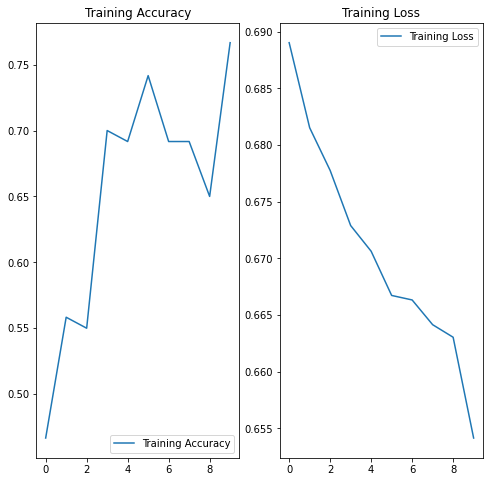

In [105]:
acc = history_inception_V3.history['accuracy']

loss = history_inception_V3.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [106]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [107]:
# export_path_sm = "./inception_V3"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [108]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [109]:
result_inception_V3 = {}

In [110]:
inception_V3.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_203[0][0]    
______________________________________________________________________________________

In [111]:
os.chdir('/content')

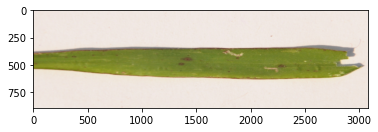

In [112]:
os.chdir('paddy_disease_classification/testing/Leaf smut')
test_image = plt.imread('DSC_0293.JPG')
img = keras.preprocessing.image.load_img('DSC_0293.JPG', target_size=(299,299, 3))
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.inception_v3.preprocess_input(img)
plt.imshow(test_image)
os.chdir('/content')

In [154]:
layer_name = 'conv2d_231'

# Taking output from 'block8_1_conv'
layer_output = inception_V3.get_layer(layer_name).output

# Generating a substance model from the pre_trained_model.
# model with input layer of pre_trained_model and output layer of 'mixed_7a'
feature_extraction_model_2 = tf.keras.Model(inputs=inception_V3.input, outputs=layer_output)

# Extracting the features
result = feature_extraction_model_2.predict(img)
print(result.shape)

(1, 35, 35, 96)


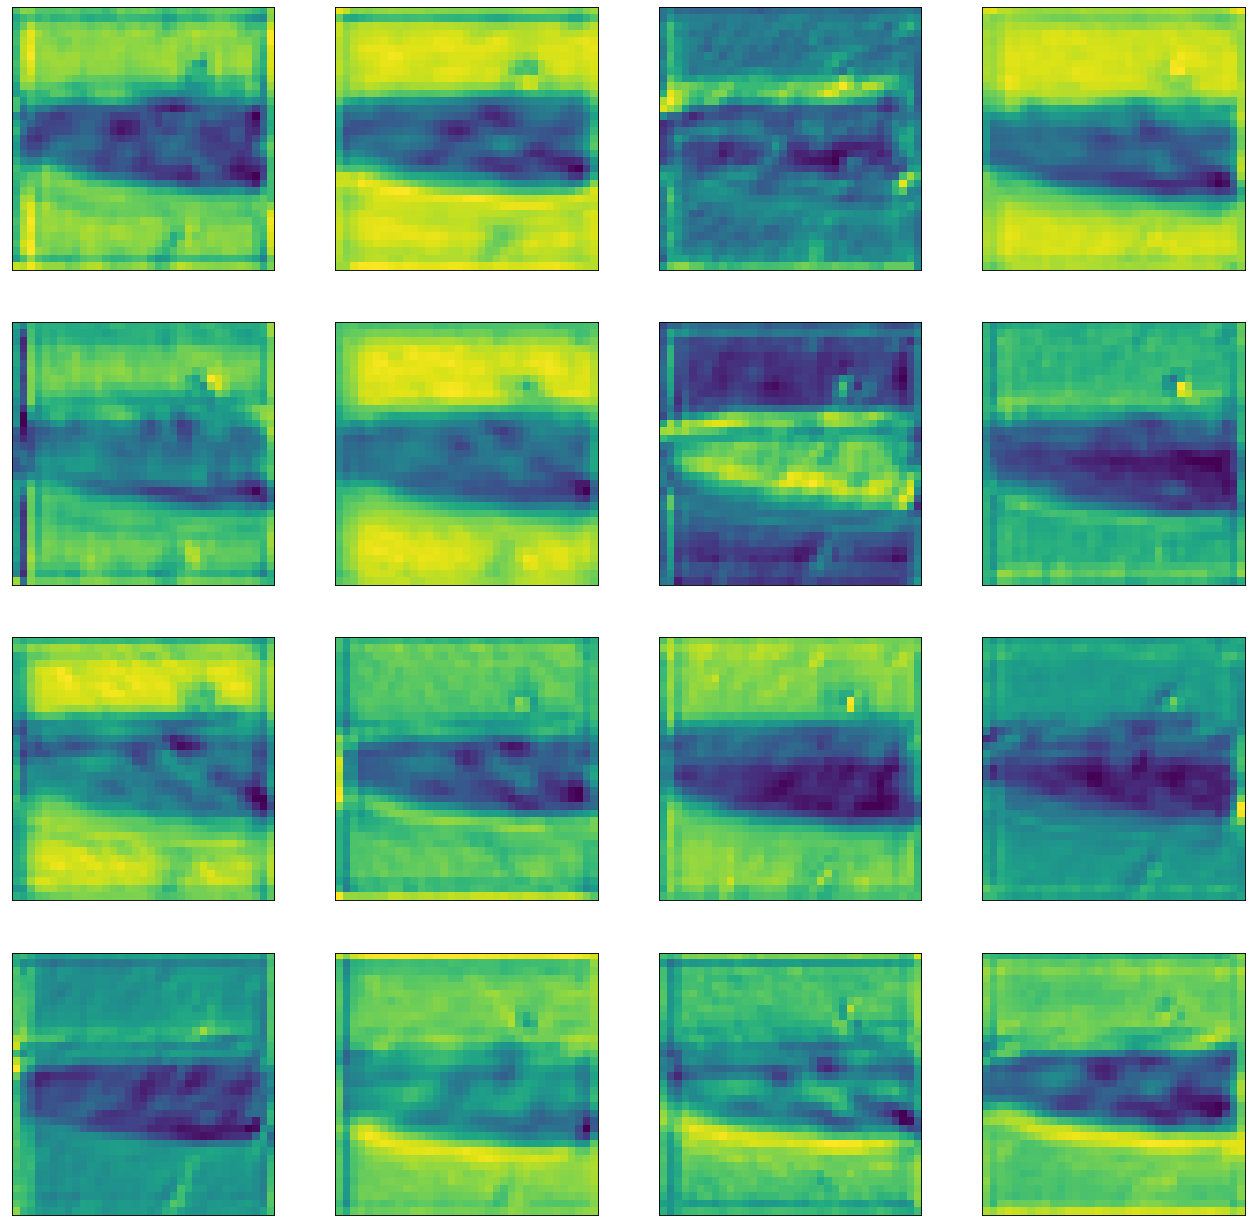

<Figure size 432x288 with 0 Axes>

In [156]:

'''	Plotting Various Features obtained from feature_extraction_model. '''
plot_limit = 4
index = 1
i=96
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, i-1])
		index += 1;i-=1
# show the figure
plt.show()
# Saving the Plot for future reference.
plt.savefig('Activations1.png')

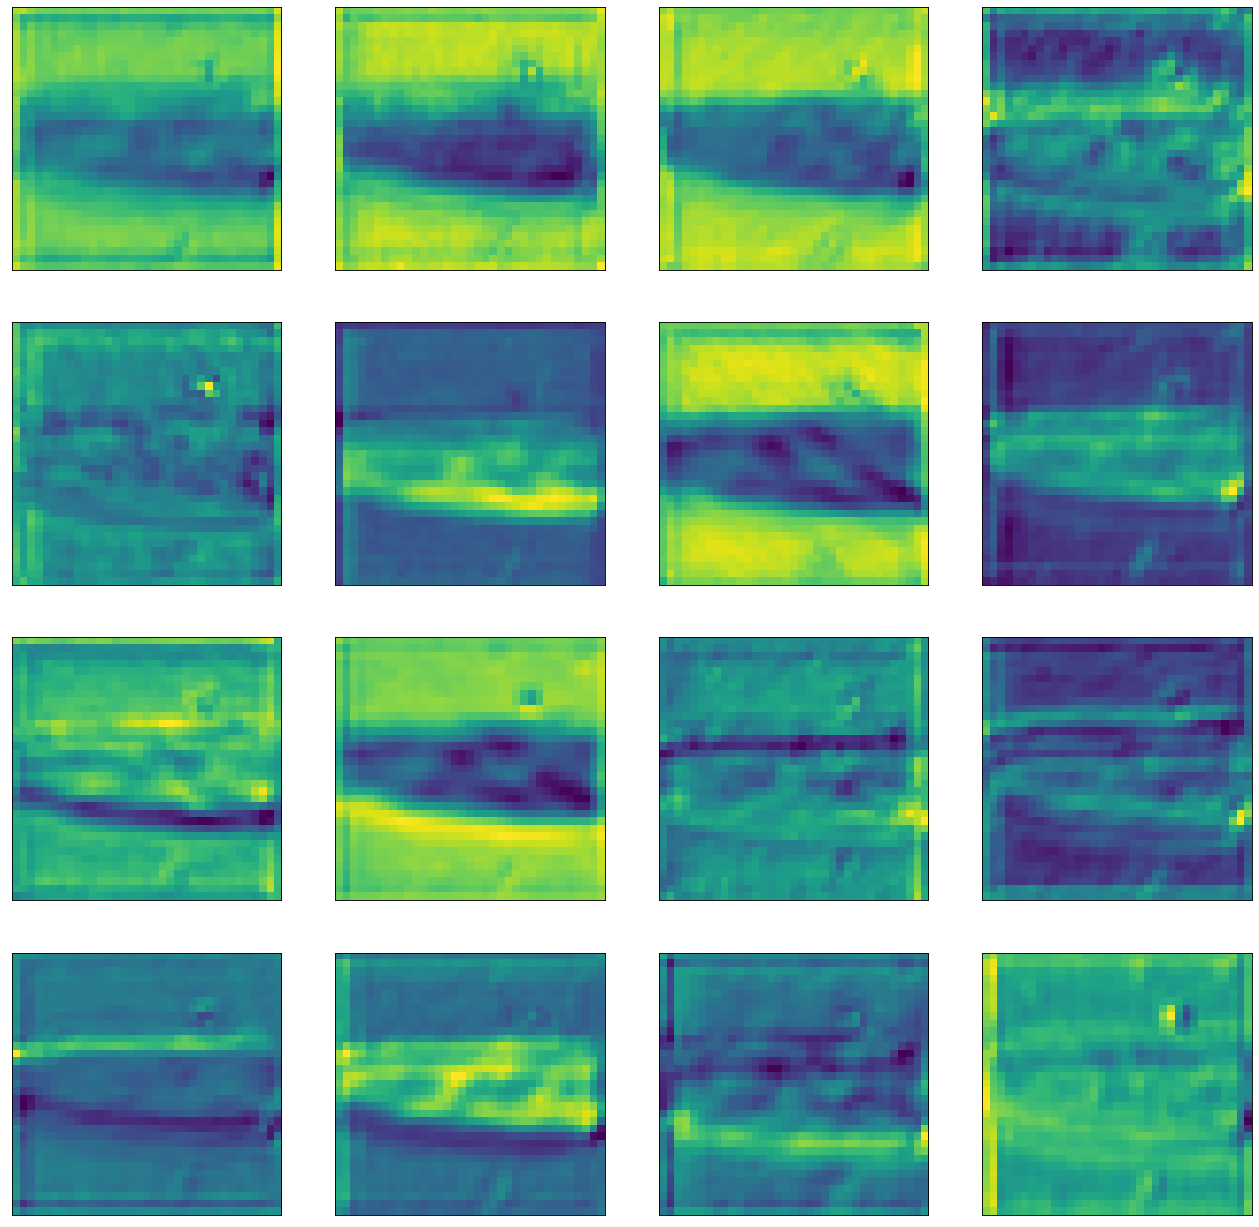

<Figure size 432x288 with 0 Axes>

In [157]:
# PLoting various features from the feature_extraction_model
plot_limit = 4
index = 1
layer_no = 32
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, layer_no],aspect="auto")
		index += 1;layer_no -= 1;
# show the figure
plt.show()
plt.savefig('Activations2.png')

In [ ]:
# Pre trained model 
inception_V3_pre_trained = InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
for layer in inception_V3_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='sigmoid')(inception_V3_pre_trained.output)
inception_V3 = Model(inputs=inception_V3_pre_trained.input, outputs=predictions)

In [ ]:
inception_V3.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

EPOCHS = 10
history_inception_V3 = inception_V3.fit(
    train_data_gen,
    epochs=EPOCHS
)

Epoch 1/10
6/6 [==============================] - 4s 645ms/step - loss: 0.6890 - accuracy: 0.4667
Epoch 2/10
6/6 [==============================] - 5s 780ms/step - loss: 0.6815 - accuracy: 0.5583
Epoch 3/10
6/6 [==============================] - 5s 750ms/step - loss: 0.6778 - accuracy: 0.5500
Epoch 4/10
6/6 [==============================] - 5s 785ms/step - loss: 0.6729 - accuracy: 0.7000
Epoch 5/10
6/6 [==============================] - 5s 758ms/step - loss: 0.6706 - accuracy: 0.6917
Epoch 6/10
6/6 [==============================] - 4s 741ms/step - loss: 0.6667 - accuracy: 0.7417
Epoch 7/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6663 - accuracy: 0.6917
Epoch 8/10
6/6 [==============================] - 5s 766ms/step - loss: 0.6641 - accuracy: 0.6917
Epoch 9/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6630 - accuracy: 0.6500
Epoch 10/10
6/6 [==============================] - 5s 771ms/step - loss: 0.6541 - accuracy: 0.7667


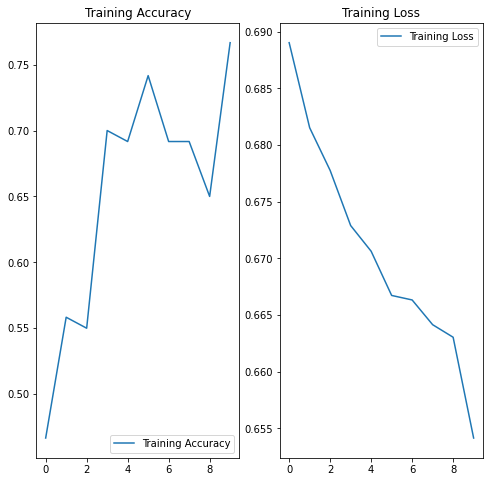

In [ ]:
acc = history_inception_V3.history['accuracy']

loss = history_inception_V3.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [ ]:
# export_path_sm = "./inception_V3"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [ ]:
result_inception_V3 = {}

In [ ]:
inception_V3.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_203[0][0]    
______________________________________________________________________________________

In [ ]:
os.chdir('/content')

In [ ]:
# Pre trained model 
inception_V3_pre_trained = InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
for layer in inception_V3_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='sigmoid')(inception_V3_pre_trained.output)
inception_V3 = Model(inputs=inception_V3_pre_trained.input, outputs=predictions)

In [ ]:
inception_V3.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

EPOCHS = 10
history_inception_V3 = inception_V3.fit(
    train_data_gen,
    epochs=EPOCHS
)

Epoch 1/10
6/6 [==============================] - 4s 645ms/step - loss: 0.6890 - accuracy: 0.4667
Epoch 2/10
6/6 [==============================] - 5s 780ms/step - loss: 0.6815 - accuracy: 0.5583
Epoch 3/10
6/6 [==============================] - 5s 750ms/step - loss: 0.6778 - accuracy: 0.5500
Epoch 4/10
6/6 [==============================] - 5s 785ms/step - loss: 0.6729 - accuracy: 0.7000
Epoch 5/10
6/6 [==============================] - 5s 758ms/step - loss: 0.6706 - accuracy: 0.6917
Epoch 6/10
6/6 [==============================] - 4s 741ms/step - loss: 0.6667 - accuracy: 0.7417
Epoch 7/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6663 - accuracy: 0.6917
Epoch 8/10
6/6 [==============================] - 5s 766ms/step - loss: 0.6641 - accuracy: 0.6917
Epoch 9/10
6/6 [==============================] - 5s 783ms/step - loss: 0.6630 - accuracy: 0.6500
Epoch 10/10
6/6 [==============================] - 5s 771ms/step - loss: 0.6541 - accuracy: 0.7667


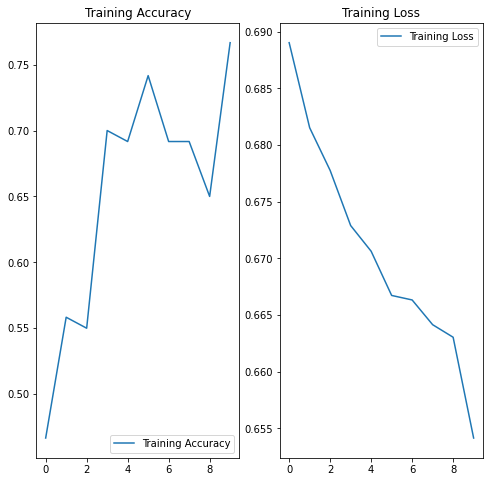

In [ ]:
acc = history_inception_V3.history['accuracy']

loss = history_inception_V3.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [ ]:
# export_path_sm = "./inception_V3"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [ ]:
result_inception_V3 = {}

In [ ]:
inception_V3.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_203[0][0]    
______________________________________________________________________________________

In [ ]:
os.chdir('/content')